In [2]:
import pandas_datareader as pd

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [4]:
from pandas_datareader import data as pdr
import yfinance as yfin


yfin.pdr_override()

df = pdr.get_data_yahoo('INFY', start='2001-10-01', end='2023-08-06')

df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2001-10-01,1.070938,1.070938,0.990313,1.037500,0.695814,2073600
2001-10-02,1.015938,1.093750,1.008125,1.093750,0.733539,966400
2001-10-03,1.018750,1.120313,1.018750,1.071875,0.718868,8710400
2001-10-04,1.124688,1.175000,1.072188,1.140625,0.764977,5382400
2001-10-05,1.125000,1.218438,1.125000,1.169063,0.784049,3206400


In [5]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-07-31,16.620001,16.750000,16.600000,16.660000,16.660000,6604000
2023-08-01,16.719999,16.840000,16.650000,16.799999,16.799999,7462200
2023-08-02,16.540001,16.600000,16.430000,16.520000,16.520000,11896400
2023-08-03,16.520000,16.559999,16.440001,16.510000,16.510000,10134400
2023-08-04,16.680000,16.879999,16.639999,16.709999,16.709999,7012200


In [8]:
df = df.reset_index()
df.head()

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2001-10-01,1.070938,1.070938,0.990313,1.037500,0.695814,2073600
1,1,2001-10-02,1.015938,1.093750,1.008125,1.093750,0.733539,966400
2,2,2001-10-03,1.018750,1.120313,1.018750,1.071875,0.718868,8710400
3,3,2001-10-04,1.124688,1.175000,1.072188,1.140625,0.764977,5382400
4,4,2001-10-05,1.125000,1.218438,1.125000,1.169063,0.784049,3206400


In [9]:
df = df.drop(['index','Date','Adj Close'], axis=1)

In [10]:
df.head()

,Open,High,Low,Close,Volume
0,1.070938,1.070938,0.990313,1.037500,2073600
1,1.015938,1.093750,1.008125,1.093750,966400
2,1.018750,1.120313,1.018750,1.071875,8710400
3,1.124688,1.175000,1.072188,1.140625,5382400
4,1.125000,1.218438,1.125000,1.169063,3206400


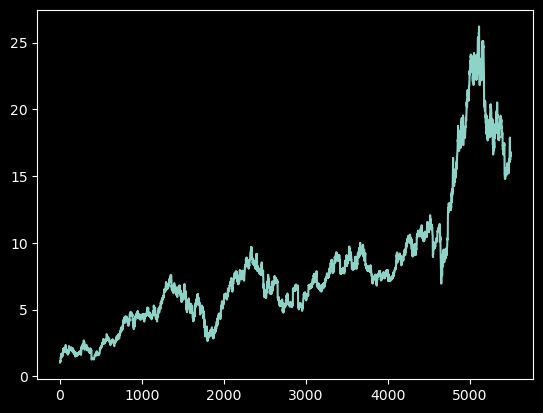

In [11]:
plt.style.use('dark_background')
plt.plot(df.Close)

In [12]:
df

,Open,High,Low,Close,Volume
0,1.070938,1.070938,0.990313,1.037500,2073600
1,1.015938,1.093750,1.008125,1.093750,966400
2,1.018750,1.120313,1.018750,1.071875,8710400
3,1.124688,1.175000,1.072188,1.140625,5382400
4,1.125000,1.218438,1.125000,1.169063,3206400
...,...,...,...,...,...
5494,16.620001,16.750000,16.600000,16.660000,6604000
5495,16.719999,16.840000,16.650000,16.799999,7462200
5496,16.540001,16.600000,16.430000,16.520000,11896400
5497,16.520000,16.559999,16.440001,16.510000,10134400


In [13]:
ma100 = df.Close.rolling(100).mean()

In [14]:
ma100

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
5494    16.0904
5495    16.0768
5496    16.0648
5497    16.0531
5498    16.0475
Name: Close, Length: 5499, dtype: float64

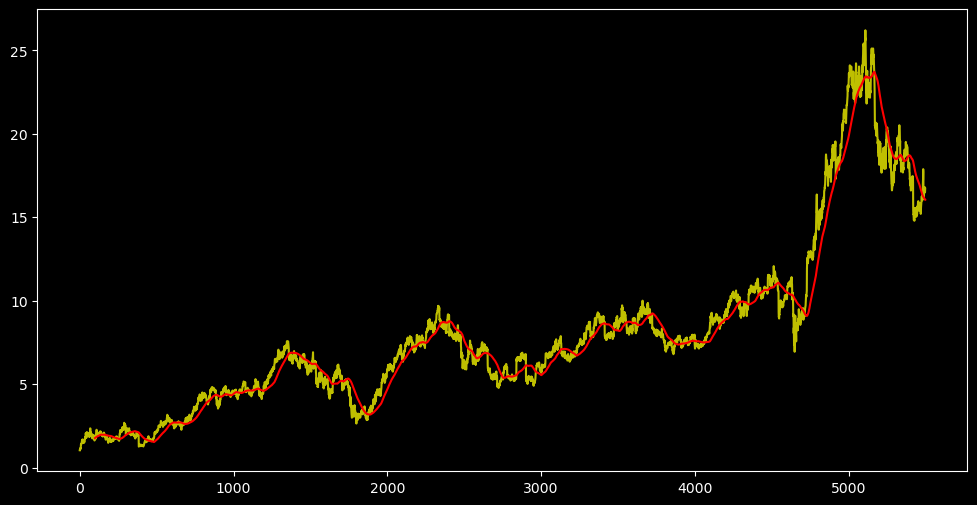

In [15]:
plt.style.use('dark_background')
plt.figure(figsize=(12,6))
plt.plot(df.Close,'y')
plt.plot(ma100,'r')

In [16]:
ma200 = df.Close.rolling(200).mean()
ma200

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
5494    17.39630
5495    17.39480
5496    17.38715
5497    17.38065
5498    17.37340
Name: Close, Length: 5499, dtype: float64

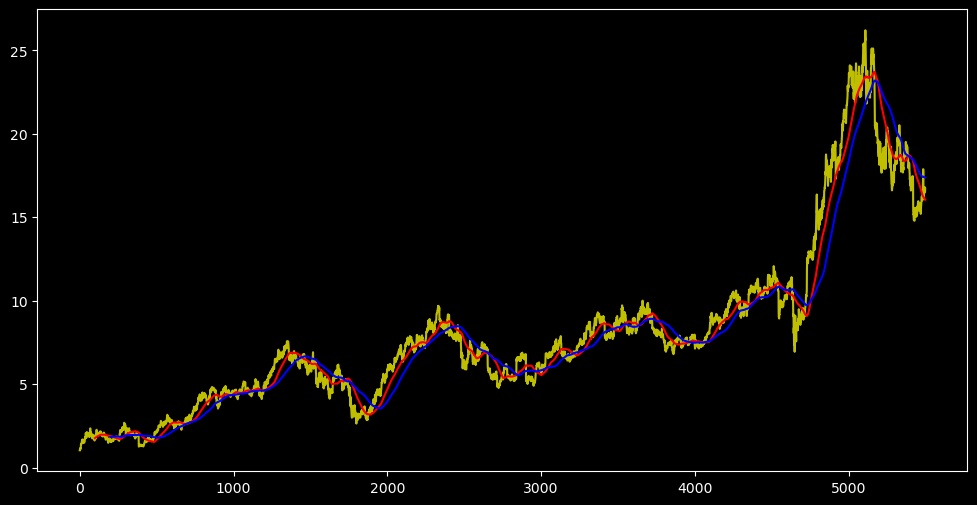

In [17]:
plt.figure(figsize=(12,6))
plt.plot(df.Close,'y')
plt.plot(ma100,'r')
plt.plot(ma200,'b')

In [18]:
df.shape

(5499, 5)

In [19]:
#spliting data into training and testing

data_train = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_test = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_train.shape)
print(data_test.shape)

(3849, 1)
(1650, 1)


In [20]:
data_train.head()

,Close
0,1.037500
1,1.093750
2,1.071875
3,1.140625
4,1.169063


In [21]:
data_test.head()

,Close
3849,7.250
3850,7.245
3851,7.220
3852,7.195
3853,7.180


In [22]:
#normalization of data

class MinMaxScalerLayer(tf.keras.layers.Layer):
    def __init__(self, feature_range=(0, 1), **kwargs):
        super(MinMaxScalerLayer, self).__init__(**kwargs)
        self.feature_range = feature_range
        self.data_min = None
        self.data_max = None

    def adapt(self, data):
        data = tf.convert_to_tensor(data)
        self.data_min = tf.math.reduce_min(data, axis=0)
        self.data_max = tf.math.reduce_max(data, axis=0)

    def call(self, inputs):
        if self.data_min is None or self.data_max is None:
            raise RuntimeError("The layer has not been adapted. Call 'adapt' before using the layer.")
        
        inputs = tf.convert_to_tensor(inputs)
        scaled_data = (inputs - self.data_min) / (self.data_max - self.data_min)
        return self.feature_range[0] + (scaled_data * (self.feature_range[1] - self.feature_range[0]))


    def get_config(self):
        config = super(MinMaxScalerLayer, self).get_config()
        config.update({
            "feature_range": self.feature_range
        })
        return config

    

In [23]:
#data_train_array = min_max_scale.fit_transform(data_train)
#data_train_array


minmax_scaler_layer = MinMaxScalerLayer(feature_range=(0, 1))
minmax_scaler_layer.adapt(data_train)
data_scaled_keras = minmax_scaler_layer(data_train)

In [24]:
data_scaled_keras.shape

TensorShape([3849, 1])

In [25]:
x_train = []
y_train = []

for i in range(100,data_scaled_keras.shape[0]):
    x_train.append(data_scaled_keras[i-100:i])
    y_train.append(data_scaled_keras[i,0])
x_train, y_train = np.array(x_train),np.array(y_train)

In [26]:
x_train.shape

(3749, 100, 1)

In [27]:
x_train

array([[[0.        ],
        [0.00627615],
        [0.00383542],
        ...,
        [0.07182705],
        [0.0740935 ],
        [0.08211302]],

       [[0.00627615],
        [0.00383542],
        [0.01150627],
        ...,
        [0.0740935 ],
        [0.08211302],
        [0.08716876]],

       [[0.00383542],
        [0.01150627],
        [0.01467927],
        ...,
        [0.08211302],
        [0.08716876],
        [0.08375175]],

       ...,

       [[0.77238494],
        [0.77015342],
        [0.77126916],
        ...,
        [0.72217576],
        [0.71101811],
        [0.71882845]],

       [[0.77015342],
        [0.77126916],
        [0.76569039],
        ...,
        [0.71101811],
        [0.71882845],
        [0.7087866 ]],

       [[0.77126916],
        [0.76569039],
        [0.80697355],
        ...,
        [0.71882845],
        [0.7087866 ],
        [0.73165967]]])

In [28]:
#ML Model

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [30]:
model = Sequential()

model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [32]:
#tf.data.experimental.enable_debug_mode()

In [33]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=55)

Epoch 1/55
118/118 [==============================] - 18s 123ms/step - loss: 0.0349
Epoch 2/55
118/118 [==============================] - 14s 120ms/step - loss: 0.0095
Epoch 3/55
118/118 [==============================] - 14s 122ms/step - loss: 0.0086
Epoch 4/55
118/118 [==============================] - 14s 122ms/step - loss: 0.0078
Epoch 5/55
118/118 [==============================] - 14s 123ms/step - loss: 0.0070
Epoch 6/55
118/118 [==============================] - 14s 122ms/step - loss: 0.0062
Epoch 7/55
118/118 [==============================] - 14s 123ms/step - loss: 0.0063
Epoch 8/55
118/118 [==============================] - 14s 122ms/step - loss: 0.0057
Epoch 9/55
118/118 [==============================] - 14s 121ms/step - loss: 0.0059
Epoch 10/55
118/118 [==============================] - 17s 141ms/step - loss: 0.0050
Epoch 11/55
118/118 [==============================] - 17s 143ms/step - loss: 0.0050
Epoch 12/55
118/118 [==============================] - 15s 123ms/step - lo

In [34]:
model.save('keras_model.h5')

C:\Users\Upayan Haldar\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [35]:
past_100_days = data_train.tail(100)
past_100_days

,Close
3749,7.900
3750,8.270
3751,8.195
3752,8.025
3753,7.950
...,...
3844,7.410
3845,7.480
3846,7.390
3847,7.595


In [36]:
final_df = pd.concat([past_100_days, data_test], ignore_index=True)

In [37]:
final_df.head()

,Close
0,7.900
1,8.270
2,8.195
3,8.025
4,7.950


In [38]:
minmax_scaler_layer = MinMaxScalerLayer(feature_range=(0, 1))
minmax_scaler_layer.adapt(final_df)
input_data = minmax_scaler_layer(final_df)
input_data

#input_data = scaler.fit_transform(final_df)
#input_data

<tf.Tensor: shape=(1750, 1), dtype=float64, numpy=
array([[0.05694409],
       [0.07601135],
       [0.07214633],
       ...,
       [0.5011595 ],
       [0.50064415],
       [0.51095072]])>

In [39]:
input_data.shape

TensorShape([1750, 1])

In [40]:
x_test =[]
y_test =[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
x_test, y_test = np.array(x_test),np.array(y_test)

In [41]:
print(x_test.shape)

(1650, 100, 1)


In [42]:
print(y_test.shape)

(1650,)


In [60]:
#MAking prediction

In [43]:
y_predict = model.predict(x_test)

52/52 [==============================] - 2s 38ms/step


In [62]:
y_predict = np.array(y_predict)

In [63]:
y_predict.shape

(1650, 1)

In [44]:
maximum = df['Close'].max()

In [45]:
print(maximum)

26.200000762939453


In [49]:
y_predict = y_predict*maximum

In [50]:
y_predict

array([[ 2.9631364],
       [ 2.9649205],
       [ 2.966554 ],
       ...,
       [12.228238 ],
       [12.347441 ],
       [12.424335 ]], dtype=float32)

In [51]:
y_test.shape

(1650,)

In [59]:
y_test = y_test*maximum


In [60]:
y_test

array([ 0.6143261 ,  0.60757511,  0.57382079, ..., 13.1303792 ,
       13.11687722, 13.38690917])

In [61]:
tf.config.run_functions_eagerly(True)

In [54]:
#minmax_scaler_layer = MinMaxScalerLayer(feature_range=(0, 1))
#minmax_scaler_layer.adapt(y_predict)
#y_predict_inverse = minmax_scaler_layer(y_predict)

#y_predict_inverse = minmax_scaler_layer.inverse_transform(y_predict)

In [55]:
#y_predict_inverse

In [56]:
#if y_test.dtype != tf.float32:
    #y_test = tf.cast(y_test, tf.float32)

#minmax_scaler_layer = MinMaxScalerLayer(feature_range=(0, 1))
#minmax_scaler_layer.adapt(y_test)
#y_test_inverse = minmax_scaler_layer(y_test)

#y_test_inverse = minmax_scaler_layer.inverse_transform(y_test)

In [57]:
#y_test_inverse

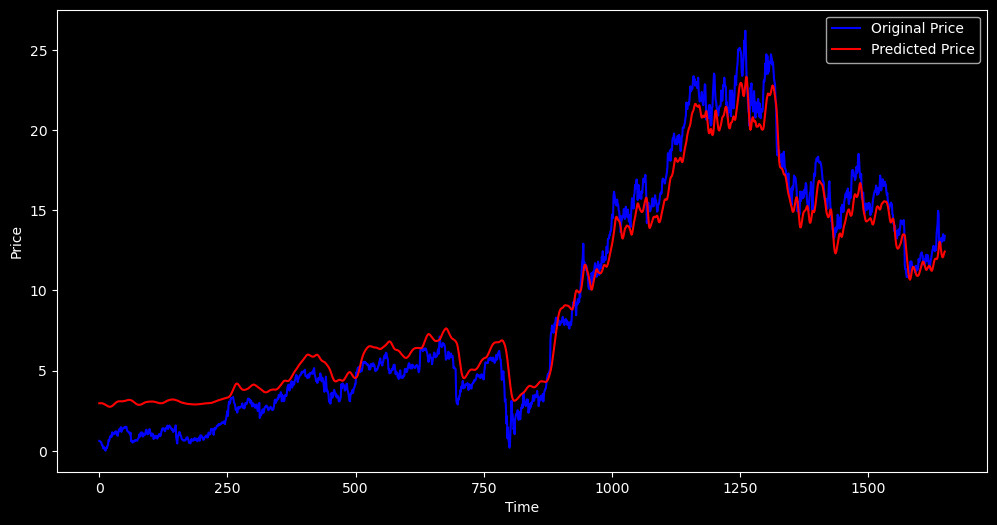

In [62]:
plt.style.use('dark_background')
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b' ,label='Original Price')
plt.plot(y_predict, 'r' ,label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()